In [72]:
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import nbimporter
from Financial_Data import search_stock_symbol,symbol_changes,pe_and_market_cap,rsi,analyze_rsi,macd,interpret_macd,fibonacci_retracement,fib_insight,calculate_trend,analyze_trend
import matplotlib.pyplot as plt
import pandas as pd

Enter a name: tcs

Sell stocks of Tata Consultancy Services Limited
Current Price of Tata Consultancy Services Limited: 4106.0
Market Cap of Tata Consultancy Services Limited: 1485587.75 Crores
The P/E ratio is 31.43, which is above 20, hence SELL


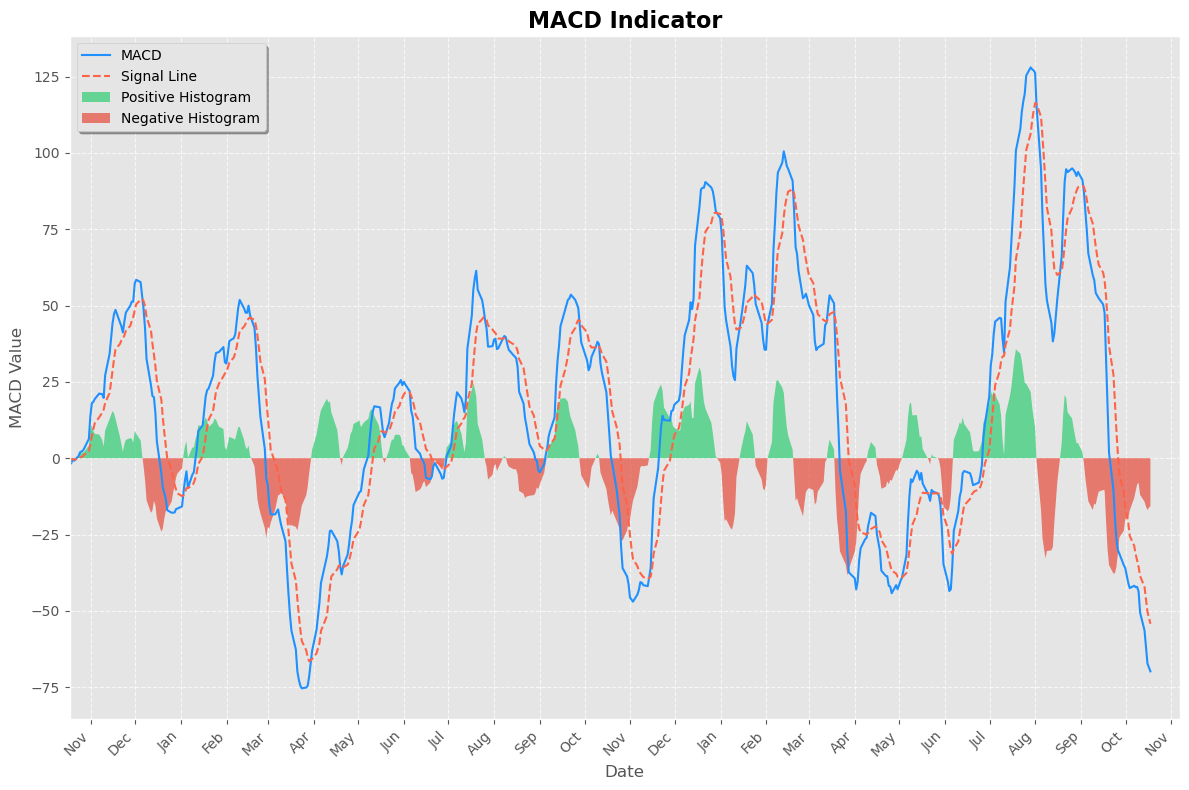

Strong Sell: MACD is below Signal Line and both are falling.


RSI is 27.89 and rising from oversold conditions. Strong buying opportunity, but be aware of potential false signals.


Overall, price is trending upwards. Recommendation: Hold or Buy in the future when the oppurtunity turns up.

Although the stock has been falling recently, it remains in an overall uptrend. This could be a temporary pullback in a larger bullish move.


In [41]:
%run Financial_Data.ipynb

In [44]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,MACD,Signal Line,...,Rolling_Min_Low_Short,Rolling_Min_Low_Long,HL_Short,HL_Long,LL_Short,LL_Long,Bullish_Strength_Short,Bearish_Strength_Short,Bullish_Strength_Long,Bearish_Strength_Long
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-18 00:00:00+05:30,3066.594284,3071.802722,3045.712285,3061.434570,1793722,0.0,0.0,NaN,0.000000,0.000000,...,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN
2022-10-19 00:00:00+05:30,3075.355697,3075.355697,3029.600167,3039.189453,1194289,0.0,0.0,NaN,-1.774539,-0.354908,...,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN
2022-10-20 00:00:00+05:30,3022.785682,3076.329389,3022.785682,3073.700928,1587601,0.0,0.0,NaN,-0.391573,-0.362241,...,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN
2022-10-21 00:00:00+05:30,3074.187627,3076.718641,3044.203104,3054.327637,1021913,0.0,0.0,NaN,-0.849038,-0.459600,...,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN
2022-10-24 00:00:00+05:30,3086.161857,3093.852585,3071.461582,3077.984131,260949,0.0,0.0,NaN,0.689353,-0.229810,...,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'RSI', 'MACD', 'Signal Line', 'Histogram', 'MACD_slope', 'Signal_slope',
       'Signal', 'Prediction', 'Rolling_Max_High_Short',
       'Rolling_Max_High_Long', 'HH_Short', 'HH_Long', 'LH_Short', 'LH_Long',
       'Rolling_Min_Low_Short', 'Rolling_Min_Low_Long', 'HL_Short', 'HL_Long',
       'LL_Short', 'LL_Long', 'Bullish_Strength_Short',
       'Bearish_Strength_Short', 'Bullish_Strength_Long',
       'Bearish_Strength_Long'],
      dtype='object')

In [45]:
data.shape

(493, 31)

In [112]:
model = LinearRegression()

In [140]:
# X
features = [
    'RSI', 'MACD', 'Signal Line', 'Histogram', 'Bullish_Strength_Short',
    'Bearish_Strength_Short', 'Volume', 'Rolling_Max_High_Short','Rolling_Min_Low_Short']

#Y 
data['Next_Close'] = data['Close'].shift(-1)

data = data.dropna()

In [141]:
X = data[features]
y = data['Next_Close']

In [142]:
%%time
# No shuffling because data is time sensitive
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

CPU times: user 8.13 ms, sys: 56 µs, total: 8.18 ms
Wall time: 6.72 ms


LinearRegression()

In [143]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

In [144]:
print(round((mse ** 0.5), 3))

78.486


In [145]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [146]:
print(mae)
print(r2)

60.741357089001106
0.8966095686600518


In [54]:
# 1
print(mae)
print(r2)

56.387241094077815
0.89768388461523


In [147]:
# 4
np.mean(np.abs((y_test - model.predict(X_test)) / y_test)) * 100

1.441846413957038

In [92]:
# 3
np.mean(np.abs((y_test - model.predict(X_test)) / y_test)) * 100

1.3079217699128427

In [55]:
# 1
np.mean(np.abs((y_test - model.predict(X_test)) / y_test)) * 100

1.331110385895727

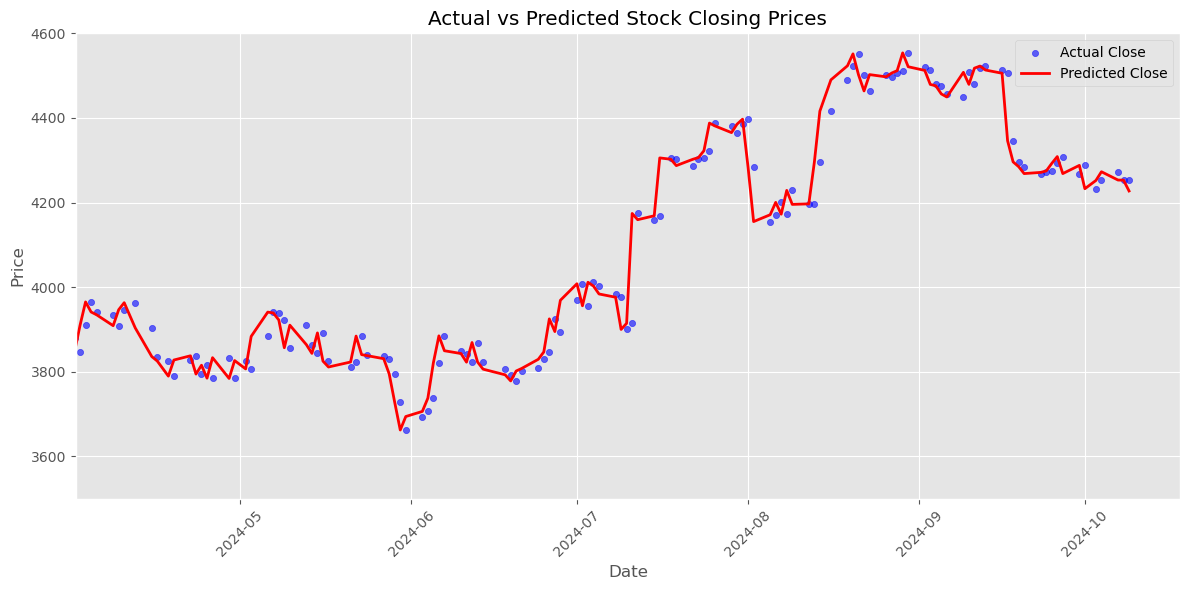

In [148]:
plt.figure(figsize=(12, 6))

# Scatter plot for actual closing prices
plt.scatter(data['Date'], data['Close'], label='Actual Close', color='blue', alpha=0.6, s=20)

# Line plot for predicted closing prices
plt.plot(data['Date'], data['Next_Close'], label='Predicted Close', color='red', linewidth=2)

plt.title('Actual vs Predicted Stock Closing Prices')
plt.xlim(pd.to_datetime('2024-04-01'), pd.to_datetime('2024-10-18'))
plt.ylim(3500,4600)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [149]:
tscv = TimeSeriesSplit(n_splits=5)

# Define custom scoring functions
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse),
    'r2': make_scorer(r2_score)
}

# Perform cross-validation for R² score
cv_results = cross_val_score(model, X, y, cv=tscv, scoring=scoring['r2'])

# Output the results
print(cv_results)
print(np.mean(cv_results))

[0.62952999 0.7459358  0.86731693 0.53260691 0.83745269]
0.7225684650516261


In [ ]:
[0.62952999 0.7459358  0.86731693 0.53260691 0.83745269]
0.7225684650516261

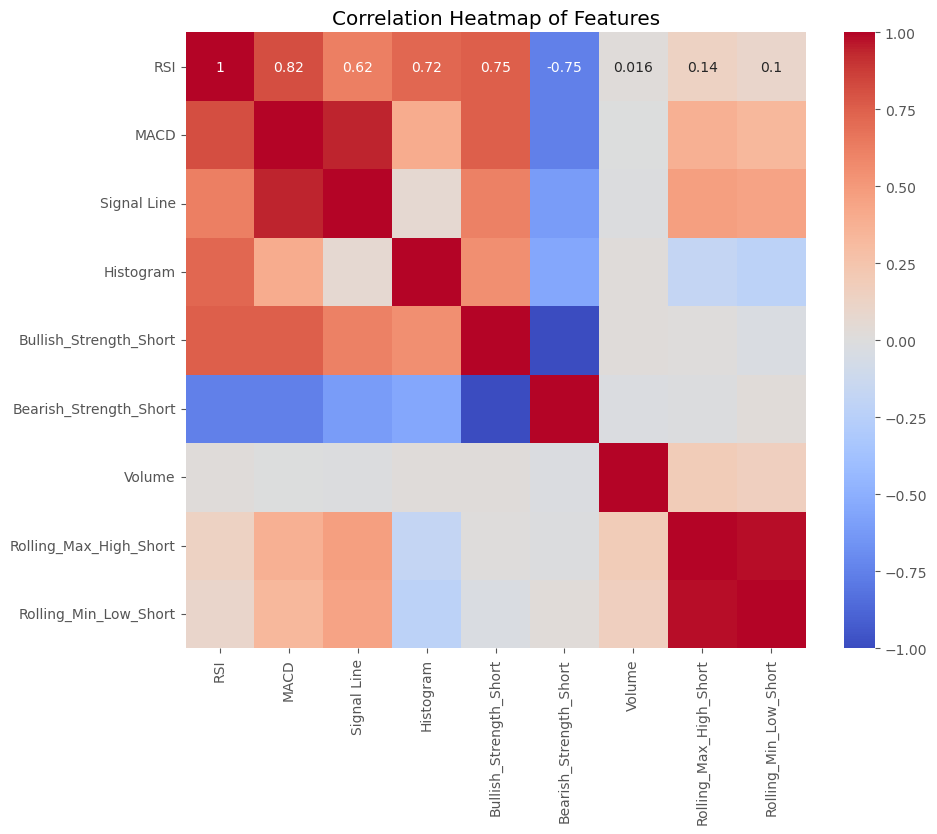

In [127]:
import seaborn as sns

corr = data[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()